# Team Moneyball

## Project Description: 

### Press Sports App users share an environment to engage with others who share similar interests. We are searching for a method to analyze and understand the driving factors of engagement with the app and other users around the country.


In [1]:
# Import dependencies 

In [44]:
# Dependecies and Setup 
import os
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# File to Load 
user_data_csv= "user_data.csv"

# Store into Pandas DataFrames
df = pd.read_csv(user_data_csv)



In [3]:
# Display the dataframe head

In [4]:
df.head()

,userId,daysOld,sport,level,classOf,state,school,schoolCount,club,clubCount,...,fanUpOnSuggestedUsers,myProfileViewed,rankingsViewed,postLikes,notificationsReceived,total_invites,daysSinceActive,daysActiveLast30,ActiveLast7,Unnamed: 29
0,v8FXVdBmWTMKygrfh0K24WHm0403,818,Baseball,High School,2024,TX,Pine Tree High School,6.0,Phenom Baseball,5.0,...,11,209,453,1373,2691,3,0,23,1,NaN
1,o16OVYwvfgYiDDzcSsQYDI8ua6d2,734,Baseball,High School,2025,GA,Savannah Christian Preparatory School,2.0,Canes Simpson,3.0,...,1,17,7,62,241,0,97,0,0,NaN
2,wLT1TgISsyeJcRocy682tp3SFD92,695,Baseball,High School,2023,GA,Dutchtown High School,1.0,NaN,NaN,...,3,127,476,1448,2360,0,171,0,0,NaN
3,AaOw4PLV3ZYp3AOVwODmqs1F6zW2,695,Baseball,High School,2023,MI,Rochester High School,10.0,South Oakland A's,18.0,...,0,21,31,49,338,0,4,5,1,NaN
4,7QqiKKMwZqe7JXhJb6NXCsui5au1,695,Baseball,High School,2025,IA,Clinton High School,5.0,NaN,NaN,...,10,262,69,42,776,2,0,18,1,NaN


In [5]:
user_count= df["userId"].nunique()
user_count

31212

In [6]:
# Begin data cleaning to fill blank cells and create new categories for users

In [7]:
df['school'] = df['school'].fillna('No_School')


In [8]:
df['club'] = df['club'].fillna('No_Club')


In [16]:
df['clubCount'] = df['clubCount'].fillna(0)
df['interests'] = df['interests'].fillna(0)

In [17]:
df['state'] = df['state'].fillna('No_State')
df['interests']

0        "BMX","Baseball","Bowling","Boxing","Cheerlead...
1        "Football","Baseball","Basketball (M)","Basket...
2        "BMX","Baseball","Basketball (M)","Basketball ...
3        "BMX","Baseball","Basketball (M)","Basketball ...
4        "Baseball","Bowling","Fishing","Snowboarding",...
                               ...                        
31207                                                    0
31208                                                    0
31209                                                    0
31210             "Football","Baseball","Boxing","Fishing"
31211                                                    0
Name: interests, Length: 31212, dtype: object

In [201]:
df['schoolCount'] = df['schoolCount'].fillna(0)
df['interests'] = df['interests'].tolist()
df['interests']

0        "BMX","Baseball","Bowling","Boxing","Cheerlead...
1        "Football","Baseball","Basketball (M)","Basket...
2        "BMX","Baseball","Basketball (M)","Basketball ...
3        "BMX","Baseball","Basketball (M)","Basketball ...
4        "Baseball","Bowling","Fishing","Snowboarding",...
                               ...                        
31207                                                  NaN
31208                                                  NaN
31209                                                  NaN
31210             "Football","Baseball","Boxing","Fishing"
31211                                                  NaN
Name: interests, Length: 31212, dtype: object

In [200]:
interests = df['interests']
interest_count = 0
# we need to convert df['interests'] to a list, then find the length of the list. Didn't have time to get to this
for each in interests:
     interest_count += 1
     df['interest count'] = interest_count

df.head()

,userId,daysOld,sport,level,classOf,state,school,schoolCount,club,clubCount,...,total_invites,daysSinceActive,daysActiveLast30,ActiveLast7,Unnamed: 29,interest count,actions_day,avg_likes,posts_day,retention
0,v8FXVdBmWTMKygrfh0K24WHm0403,818,Baseball,High School,2024,TX,Pine Tree High School,6.0,Phenom Baseball,5.0,...,3,0,23,1,NaN,31212,5.497555,21.123077,12.584615,True
1,o16OVYwvfgYiDDzcSsQYDI8ua6d2,734,Baseball,High School,2025,GA,Savannah Christian Preparatory School,2.0,Canes Simpson,3.0,...,0,97,0,0,NaN,31212,0.333787,20.666667,244.666667,False
2,wLT1TgISsyeJcRocy682tp3SFD92,695,Baseball,High School,2023,GA,Dutchtown High School,1.0,NaN,NaN,...,0,171,0,0,NaN,31212,4.532374,68.952381,33.095238,False
3,AaOw4PLV3ZYp3AOVwODmqs1F6zW2,695,Baseball,High School,2023,MI,Rochester High School,10.0,South Oakland A's,18.0,...,0,4,5,1,NaN,31212,0.494964,24.500000,347.500000,True
4,7QqiKKMwZqe7JXhJb6NXCsui5au1,695,Baseball,High School,2025,IA,Clinton High School,5.0,NaN,NaN,...,2,0,18,1,NaN,31212,3.215827,8.400000,139.000000,True


In [126]:
# get rid of outliers for total actions
# df= df.drop(columns=['Unnamed: 29'])
# df_posters = df[df.posts > 0]
# df['totalActions'].quantile(0.75)
# df['totalActions'].quantile(0.25)
# df_actions = df[df.totalActions < 2680]
# df_actions = df_actions[df_actions.totalActions > 140]

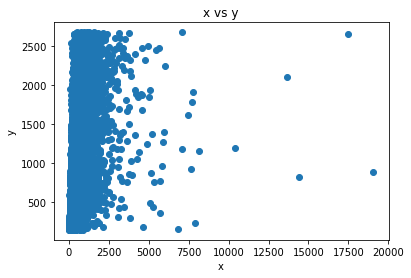

In [198]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.scatter(df['notificationsReceived'], df['totalActions'])

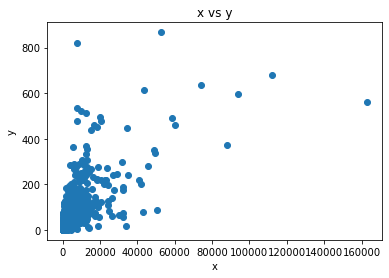

In [166]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.scatter(df['notificationsReceived'], df['posts'])

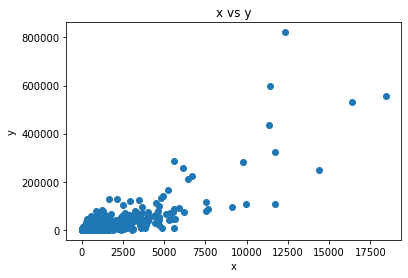

In [137]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.scatter(df['followers'], df['totalActions'])

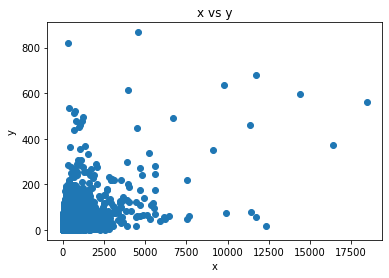

In [165]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.scatter(df['followers'], df['posts'])

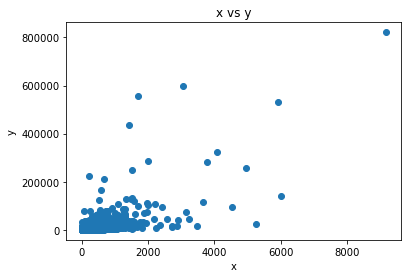

In [140]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.scatter(df['rankingsViewed'], df['totalActions'])

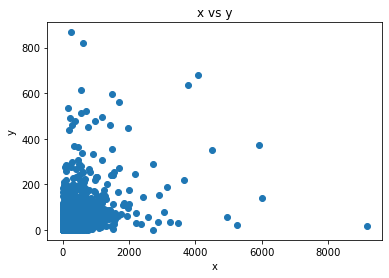

In [164]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.scatter(df['rankingsViewed'], df['posts'])

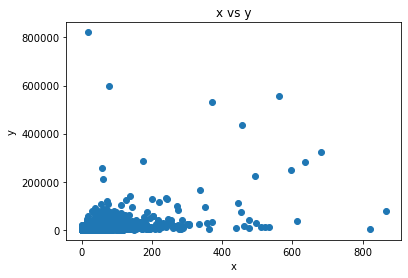

In [169]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.scatter(df['posts'], df['totalActions'])

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.scatter(df['rankingsViewed'], df['posts'])

In [196]:
# define retention (someone who is active)
retention = []

for days in df.daysActiveLast30:
    if days > 0:
        retention.append(True)
    else:
        retention.append(False)
        
df['retention'] = retention
df.head()
df_ret = df[df.retention == True]
df_noret = df[df.retention == False]

#average number of posts for those who are currently active
df_ret['posts'].mean()

14.096464394963363

In [194]:
#average number of posts for those who are not currently active
df_noret['posts'].mean()

6.143106965899155

In [13]:
# Define the levels of engagement
# Create dataframe for each engagement scenario to enable analysis 

In [14]:
# Create plots to analyze the questions regarding levels of engagement 

In [15]:
# Number of users per schooL
# Does the number of users at a school imapact the level of engagement 